# Weeks 3&4 Exercises

Author: Jordan,Andrew

Date: 06/27/2022

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pwd

'C:\\Users\\Andrew\\Documents\\Grad School\\DSC 540 - Data Preparation\\Assignments'

## 1. Activity 5, page 116

In [223]:
#Read in the Boston housing data set (given as a .csv file) from the local directory and check first 10 records
boston = pd.read_csv("data/Boston_housing.csv")
boston.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [224]:
#Find the total number of records
boston.shape

(506, 14)

In [225]:
#Create a smaller DataFrame with columns which do not include 'CHAS', 'NOX', 'B', and 'LSTAT'
boston2 = boston[['CHAS','NOX','B','LSTAT']].copy()
boston2.head(10)

,CHAS,NOX,B,LSTAT
0,0,0.538,396.90,4.98
1,0,0.469,396.90,9.14
2,0,0.469,392.83,4.03
3,0,0.458,394.63,2.94
4,0,0.458,396.90,5.33
5,0,0.458,394.12,5.21
6,0,0.524,395.60,12.43
7,0,0.524,396.90,19.15
8,0,0.524,386.63,29.93
9,0,0.524,386.71,17.10


In [226]:
#Check the last 7 records of the new DataFrame you just created
boston2.tail(7)

,CHAS,NOX,B,LSTAT
499,0,0.585,395.77,15.10
500,0,0.585,396.90,14.33
501,0,0.573,391.99,9.67
502,0,0.573,396.90,9.08
503,0,0.573,396.90,5.64
504,0,0.573,393.45,6.48
505,0,0.573,396.90,7.88


array([[<AxesSubplot:title={'center':'CHAS'}>,
        <AxesSubplot:title={'center':'NOX'}>],
       [<AxesSubplot:title={'center':'B'}>,
        <AxesSubplot:title={'center':'LSTAT'}>]], dtype=object)

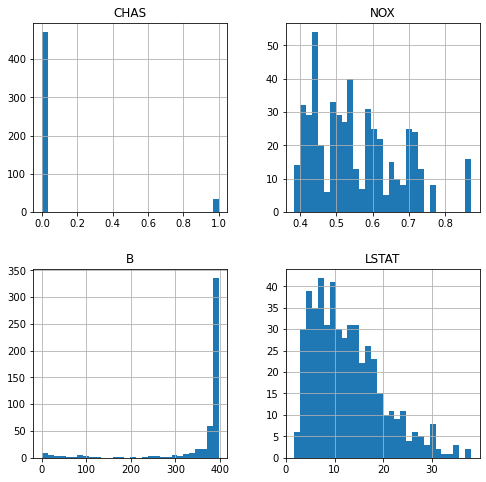

In [227]:
#Plot the histograms of all the variables(columns) in the new Dataframe
boston2.hist(figsize=(8,8),bins=30)

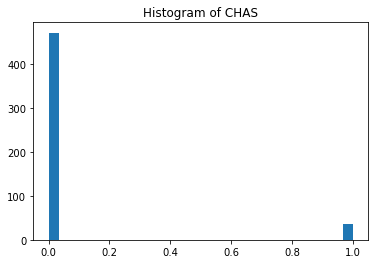

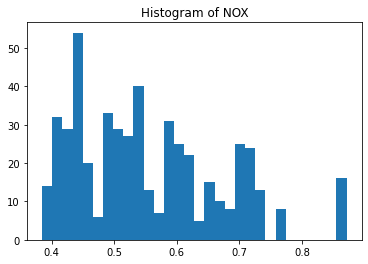

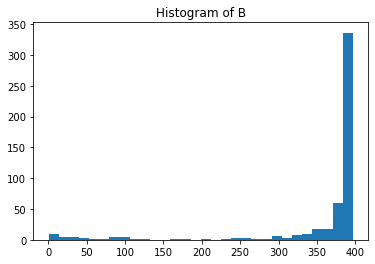

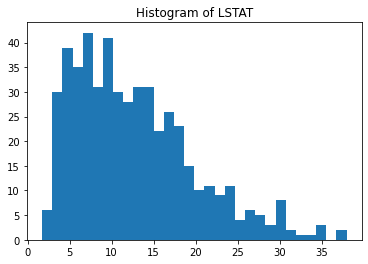

In [228]:
#Plot them all at once using a for loop. Try to add a unique title to a plot
for c in boston2.columns:
    plt.hist(boston2[c], bins=30)
    plt.title('Histogram of '+c)
    plt.show()

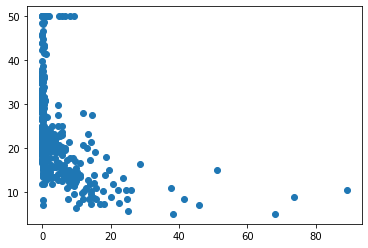

In [229]:
#Create a scatter plot of crime rate versus price
plt.scatter('CRIM','PRICE',data=boston)

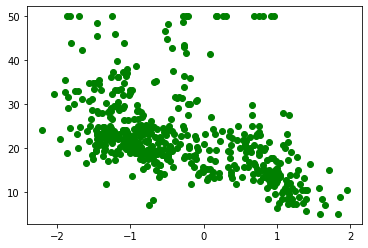

In [230]:
#Plot uising log10(crime) versus price
plt.scatter(np.log10(boston['CRIM']),boston['PRICE'],c='green')

In [231]:
#Mean rooms per dwelling
boston['RM'].mean()

6.284634387351787

In [232]:
#Median Age
boston['AGE'].median()

77.5

In [233]:
#Mean distances to five Boston employment centers
boston['DIS'].mean()

3.795042687747034

In [234]:
#Percentage of houses with a price < $20,000
price_under_20 = boston['PRICE']<20
price_under_20.mean()*100

41.50197628458498

## 2. Activity 6, page 171

In [235]:
#Import data
income_df = pd.read_csv("data/adult_income_data.csv")
income_df.head(10)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [236]:
#Create a script that will read a text file line by line
names = []
with open('data/adult_names_data.txt','r') as f:
    for line in f:
        f.readline()
        var=line.split(":")[0]
        names.append(var)
names

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country']

In [237]:
#Add a name of Income for the response variable to the dataset
names.append('Income')

In [238]:
income_df = pd.read_csv("data/adult_income_data.csv",names=names)
income_df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [239]:
#Find the missing values
income_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [240]:
#Create a dataframe with only age, education, and occupation by using subsetting
income_subset = income_df[['age','education','occupation']]
income_subset.head(5)

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
3,53,11th,Handlers-cleaners
4,28,Bachelors,Prof-specialty


<AxesSubplot:>

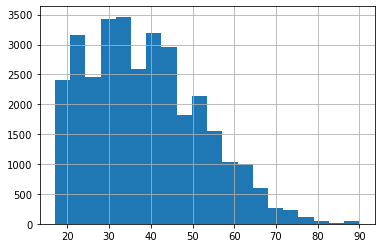

In [241]:
#Plot a histogram of age with a bin size of 20
income_subset['age'].hist(bins=20)

In [242]:
#Create a function to strip the whitespace characters
def strip_whitespace(s):
    return s.strip()

In [243]:
income_subset['education_strip']=income_subset['education'].apply(strip_whitespace)
income_subset['education']=income_subset['education_strip']
income_subset.drop(labels=['education_strip'], axis=1, inplace=True)

income_subset['occupation_strip']=income_subset['occupation'].apply(strip_whitespace)
income_subset['occupation']=income_subset['occupation_strip']
income_subset.drop(labels=['occupation_strip'], axis=1, inplace=True)

C:\Users\Andrew\AppData\Local\Temp/ipykernel_13648/2936763614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_subset['education_strip']=income_subset['education'].apply(strip_whitespace)
C:\Users\Andrew\AppData\Local\Temp/ipykernel_13648/2936763614.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_subset['education']=income_subset['education_strip']
C:\Users\Andrew\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [244]:
#Find the number of people who are aged between 30 and 50
income_aged = income_subset[(income_subset['age']>=30) & (income_subset['age']<=50)]
income_aged.head(5)

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
5,37,Masters,Exec-managerial
6,49,9th,Other-service


In [245]:
#Group the records based on occupation to find how the mean age is distributed
income_subset.groupby('occupation').describe()['age']

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
?,1843.0,40.882800,20.336350,17.0,21.0,35.0,61.0,90.0
Adm-clerical,3770.0,36.964456,13.362998,17.0,26.0,35.0,46.0,90.0
Armed-Forces,9.0,30.222222,8.089774,23.0,24.0,29.0,34.0,46.0
Craft-repair,4099.0,39.031471,11.606436,17.0,30.0,38.0,47.0,90.0
Exec-managerial,4066.0,42.169208,11.974548,17.0,33.0,41.0,50.0,90.0
Farming-fishing,994.0,41.211268,15.070283,17.0,29.0,39.0,52.0,90.0
Handlers-cleaners,1370.0,32.165693,12.372635,17.0,23.0,29.0,39.0,90.0
Machine-op-inspct,2002.0,37.715285,12.068266,17.0,28.0,36.0,46.0,90.0
Other-service,3295.0,34.949621,14.521508,17.0,22.0,32.0,45.0,90.0


## 3. Create a series and practice basic arithmetic steps

In [246]:
#Create first series
series1 = pd.Series([7.3,-2.5,3.4,1.5],index =['a','c','d','e'])
series1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [247]:
#Create second series
series2 = pd.Series([-2.1,3.6,-1.5,4,3.1],index = ['a','c','e','f','g'])
series2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [248]:
#Add series together
series3 = series1 + series2
series3

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In [249]:
#Subtract series1 from series2
series4 = series2 - series1
series4

a   -9.4
c    6.1
d    NaN
e   -3.0
f    NaN
g    NaN
dtype: float64

## 4. Activity 7, page 207

In [250]:
#Import library
from bs4 import BeautifulSoup

In [251]:
#Read the page using bs4
wikiPage = open("List of countries by GDP (nominal) - Wikipedia.htm","r", encoding="utf8")
goodSoup = BeautifulSoup(wikiPage)
wikiPage.close()

In [252]:
#Find the table structure you will need to deal with (how many tables there are?)
table_count = goodSoup.find_all("table")
len(table_count)

9

In [253]:
#Find the right table using bs4
right_table = goodSoup.find("table", {"class": '"wikitable"|}'})
print(type(right_table))

<class 'bs4.element.Tag'>


In [254]:
#Separate the source names and their corresponding data
name_source = right_table.tbody.findAll('tr', recursive=False)[0]
name_source_list = [td for td in name_source.findAll('td')]

corresponding_data = right_table.tbody.findAll('tr', recursive=False)[1].findAll('td',recursive=False)
corr_tables = []
for td in corresponding_data:
    corr_tables.append(td.findAll('table'))

In [255]:
#Get the source names from the list of sources
source_names = [source.findAll('a')[0].getText() for source in name_source_list]
source_names

['International Monetary Fund', 'World Bank', 'United Nations']

In [256]:
# Separate the header and data from the data that you separated before the first source only 
header_sep = [th.getText().strip() for th in corr_tables[0][0].findAll('thead')[0].findAll('th')]
header_sep

['Rank', 'Country', 'GDP(US$MM)']

In [257]:
# and then create a Dataframe using that
rows_sep = corr_tables[0][0].findAll('tbody')[0].findAll('tr')[1:]
that_dataframe = pd.DataFrame([[td.get_text().strip() for td in tr.findAll('td')] for tr in rows_sep], columns=header_sep)
that_dataframe.head(10)

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,600"
1,2,China[n 1],"12,014,610"
2,3,Japan,"4,872,135"
3,4,Germany,"3,684,816"
4,5,United Kingdom,"2,624,529"
5,6,India,"2,611,012"
6,7,France,"2,583,560"
7,8,Brazil,"2,054,969"
8,9,Italy,"1,937,894"
9,10,Canada,"1,652,412"


In [258]:
#Repeat the last task for the other two data sources
#Source 2
header_sep2 = [th.getText().strip() for th in corr_tables[1][0].findAll('thead')[0].findAll('th')]
header_sep2

['Rank', 'Country', 'GDP(US$MM)']

In [259]:
rows_sep2 = corr_tables[1][0].findAll('tbody')[0].findAll('tr')[1:]
that_dataframe2 = pd.DataFrame([[td.get_text().strip() for td in tr.findAll('td')] for tr in rows_sep2], columns=header_sep2)
that_dataframe2.head(10)

,Rank,Country,GDP(US$MM)
0,1,United States,"7007193906040000000♠19,390,604"
1,,European Union[23],"7007172776980000000♠17,277,698"
2,2,China[n 4],"7007122377000000000♠12,237,700"
3,3,Japan,"7006487213700000000♠4,872,137"
4,4,Germany,"7006367743900000000♠3,677,439"
5,5,United Kingdom,"7006262243400000000♠2,622,434"
6,6,India,"7006259749100000000♠2,597,491"
7,7,France,"7006258250100000000♠2,582,501"
8,8,Brazil,"7006205550600000000♠2,055,506"
9,9,Italy,"7006193479800000000♠1,934,798"


In [260]:
#Source 3
header_sep3 = [th.getText().strip() for th in corr_tables[2][0].findAll('thead')[0].findAll('th')]
header_sep3


['Rank', 'Country', 'GDP(US$MM)']

In [261]:
rows_sep3 = corr_tables[2][0].findAll('tbody')[0].findAll('tr')[1:]
that_dataframe3 = pd.DataFrame([[td.get_text().strip() for td in tr.findAll('td')] for tr in rows_sep3], columns=header_sep3)
that_dataframe3.head(10)

,Rank,Country,GDP(US$MM)
0,1,United States,"7007186244750000000♠18,624,475"
1,2,China[n 4],"7007112182810000000♠11,218,281"
2,3,Japan,"7006493621100000000♠4,936,211"
3,4,Germany,"7006347779600000000♠3,477,796"
4,5,United Kingdom,"7006264789800000000♠2,647,898"
5,6,France,"7006246545300000000♠2,465,453"
6,7,India,"7006225964200000000♠2,259,642"
7,8,Italy,"7006185891300000000♠1,858,913"
8,9,Brazil,"7006179592500000000♠1,795,925"
9,10,Canada,"7006152976000000000♠1,529,760"


## 5. Activity 8, page 233

In [262]:
#Read the visit_data.csv file
visit_df = pd.read_csv("data/visit_data.csv")
visit_df

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0
...,...,...,...,...,...,...,...
995,996,Averil,Pickover,apickoverrn@vk.com,Male,10.45.16.167,1305.0
996,997,Walton,Hallewell,whallewellro@nasa.gov,NaN,231.224.238.232,2531.0
997,998,NaN,NaN,ggallamorerp@meetup.com,Female,118.65.94.40,NaN
998,999,Sapphira,Terron,sterronrq@wordpress.org,NaN,24.77.234.208,250.0


In [263]:
#Check for duplicates
print(any(visit_df.first_name.duplicated()))
print(any(visit_df.last_name.duplicated()))
print(any(visit_df.email.duplicated()))
print(any(visit_df.ip_address.duplicated()))

True
True
False
False


In [264]:
#Check if any essential column contains NaN
print(visit_df.id.isnull().values.any())
print(visit_df.email.isnull().values.any())
print(visit_df.ip_address.isnull().values.any())
print(visit_df.visit.isnull().values.any())

False
False
False
True


In [265]:
#Get rid of the outliers
size_before = visit_df.shape
visit_df = visit_df.dropna(subset=['visit'])
visit_df

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0
...,...,...,...,...,...,...,...
994,995,NaN,NaN,hlowethrm@army.mil,Female,104.234.36.172,747.0
995,996,Averil,Pickover,apickoverrn@vk.com,Male,10.45.16.167,1305.0
996,997,Walton,Hallewell,whallewellro@nasa.gov,NaN,231.224.238.232,2531.0
998,999,Sapphira,Terron,sterronrq@wordpress.org,NaN,24.77.234.208,250.0


In [266]:
#Report the size difference
size_after = visit_df.shape
print("The size before was", size_before[0], "rows and the size is now", size_after[0],"rows.")

The size before was 1000 rows and the size is now 974 rows.


<AxesSubplot:>

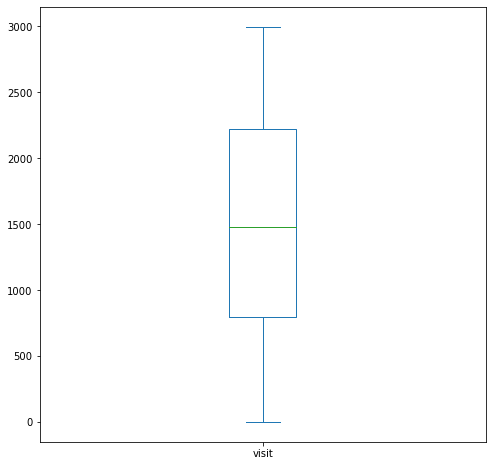

In [267]:
#Create a boxplot to check for outliers
visit_df['visit'].plot.box(figsize=(8,8))

In [268]:
#Get rid of any outliers

## As the box shows a range of approximately 750 to 2250, I will use 500 and 2500 to find outliers while allowing for
## minor variances to stay

visit_df_outlier_free = visit_df[(visit_df.visit <=2500) & (visit_df.visit >=500)]
visit_df_outlier_free

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0
6,7,Wilhelmina,Dagnan,wdagnan6@nytimes.com,Female,88.133.77.243,1540.0
...,...,...,...,...,...,...,...
992,993,Nancey,Goldsby,ngoldsbyrk@163.com,Female,86.142.91.166,1455.0
993,994,NaN,NaN,ihebblewaiterl@vimeo.com,Male,14.117.132.195,1963.0
994,995,NaN,NaN,hlowethrm@army.mil,Female,104.234.36.172,747.0
995,996,Averil,Pickover,apickoverrn@vk.com,Male,10.45.16.167,1305.0


## 6. Insert data into a SQL Lite database -- create a table with the following data
### a. Name, Address, City, State, Zip, Phone Number
### b. Add at least 10 rows of data and submit your code with a query generating your results.

In [276]:
#Load library
import sqlite3

In [277]:
#Create connection
con = sqlite3.connect('mySqlTest.db')

In [278]:
#Create cursor
cur = con.cursor()

In [279]:
#Create table
cur.execute('''CREATE TABLE classtest2
                (Name, Address, City, State Country, Zip Code, Phone Number)''')

In [280]:
#Create Data
data_for_table = [('Sherlock','221B Baker Street','London','England',99999,9987654321),
                 ('Jon Arbuckle','711 Maple Street','Muncie','Indiana',47302,7658204512),
                 ('Homer Simpson','742 Evergreen Terrace','Springfield','Illinois',62629,2179421830),
                 ('Tony Soprano','633 Stag Trail Road','North Caldwell','New Jersey',17006,8629438812),
                 ('Jerry Seinfeld','129 West 81st Street Apt 5A','New York','New York',10024,2124568873),
                 ('Charles Xavier','1407 Graymalkin Lane','Salem Center','New York',10148,9193864532),
                 ('Sophia, Dorothy, Blanche, and Rose','6151 Richmond Street','Miami Beach','Florida',33109,7864519632),
                 ('Monica Geller','425 Grove Street Apt 20','New York','New York',10024,9196847599),
                 ('Harry Potter','4 Privet Drive: Cupboard Under The Stairs','Little Whinging','England',77777,9946324125),
                 ('Hank Hill','84 Rainey Street','Arlen','Texas',78054,4094204690)]

In [281]:
#Insert data into table
cur.executemany('INSERT INTO classtest2 VALUES (?,?,?,?,?,?);', data_for_table);
con.commit()

In [282]:
#Fetch data
def data_fetch(con):
    cur.execute('SELECT * FROM classtest2')
    row_data = cur.fetchall()
    for row in row_data:
        print (row)
data_fetch(con)

('Sherlock', '221B Baker Street', 'London', 'England', 99999, 9987654321)
('Jon Arbuckle', '711 Maple Street', 'Muncie', 'Indiana', 47302, 7658204512)
('Homer Simpson', '742 Evergreen Terrace', 'Springfield', 'Illinois', 62629, 2179421830)
('Tony Soprano', '633 Stag Trail Road', 'North Caldwell', 'New Jersey', 17006, 8629438812)
('Jerry Seinfeld', '129 West 81st Street Apt 5A', 'New York', 'New York', 10024, 2124568873)
('Charles Xavier', '1407 Graymalkin Lane', 'Salem Center', 'New York', 10148, 9193864532)
('Sophia, Dorothy, Blanche, and Rose', '6151 Richmond Street', 'Miami Beach', 'Florida', 33109, 7864519632)
('Monica Geller', '425 Grove Street Apt 20', 'New York', 'New York', 10024, 9196847599)
('Harry Potter', '4 Privet Drive: Cupboard Under The Stairs', 'Little Whinging', 'England', 77777, 9946324125)
('Hank Hill', '84 Rainey Street', 'Arlen', 'Texas', 78054, 4094204690)
